# LinkedIn Data Analyst Job Listings In Africa
This notebook provides a step by step analysis of the Data Analyst job listings posted on LinkedIn

## Data Exploration & Cleaning

### Setup and Data Loading

In [11]:
import pandas as pd

# Loading the dataset CSV file
df = pd.read_csv('../data/linkedin-jobs-africa.csv')

# Exploring the dataset
print(df.head(5))


print(df.info()) 
print(df.describe())  
print(df.columns) 

# Checking data info and missing values
df.isnull().sum()

                        title                    company  \
0                Data Analyst                        NNC   
1                Data Analyst                Watu Credit   
2  Data Analyst (Credit Risk)                       Kuda   
3                Data Analyst                Watu Credit   
4                Data Analyst  Tata Consultancy Services   

                                         description onsite_remote  salary  \
0  We are looking for a passionate certified Data...        onsite     NaN   
1  WATU is a focus-driven, customer-centric compa...        onsite     NaN   
2  Kuda is a fintech on a mission to make financi...        onsite     NaN   
3  Role: Data AnalystReporting to: Data Analytics...        onsite     NaN   
4  About Tata Consultancy ServicesTata Consultanc...        onsite     NaN   

                                      location  \
0                          Cairo, Cairo, Egypt   
1                        Nairobi County, Kenya   
2        Cape Town, 

title               0
company             0
description         0
onsite_remote       0
salary           2872
location            0
criteria            0
posted_date         0
link                0
dtype: int64

In [12]:
#Removing duplicates
import pandas as pd

df = pd.read_csv('../data/linkedin-jobs-africa.csv')
df.drop_duplicates(inplace=True)

#Filling salary column with 'Not Specified'
df['salary'] = df['salary'].fillna('Not Specified')
df.head(5)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,Not Specified,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,Not Specified,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,Not Specified,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,Not Specified,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,Not Specified,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...


## Feature EAngineering

In [13]:
#Categorizing job titles into broader roles (e.g., "Data Analyst", "Business Analyst")
import pandas as pd

def categorize_job_title(title):
    # Converting title to lowercase for case-insensitive matching
    title = title.lower().strip()
    
    # Defining categorization rules 
    if 'data scientist' in title or 'machine learning analyst' in title:
        return 'Data Scientist'
    elif 'data engineer' in title or 'data engineering analyst' in title:
        return 'Data Engineer'
    elif 'analytics engineer' in title or 'data analytics engineer' in title:
        return 'Analytics Engineer'
    elif 'bi analyst' in title or 'business intelligence analyst' in title or 'bi specialist' in title:
        return 'Business Intelligence Analyst'
    elif 'data analyst' in title or 'analyst, data' in title or 'data analytics specialist' in title or 'data insights analyst' in title:
        return 'Data Analyst'
    elif 'business analyst' in title or 'business data analyst' in title:
        return 'Business Analyst'
    elif 'reporting analyst' in title or 'report analyst' in title or 'data reporting specialist' in title:
        return 'Reporting Analyst'
    elif 'financial data analyst' in title or 'finance analyst' in title:
        return 'Financial Analyst'
    elif 'operations data analyst' in title or 'operational analyst' in title:
        return 'Operations Analyst'
    elif 'marketing data analyst' in title or 'marketing analytics specialist' in title:
        return 'Marketing Analyst'
    elif 'product data analyst' in title or 'product analytics specialist' in title:
        return 'Product Analyst'
    elif 'risk data analyst' in title or 'risk analytics specialist' in title:
        return 'Risk Analyst'
    elif 'hr data analyst' in title or 'people analytics specialist' in title:
        return 'HR Analyst'
    elif 'research data analyst' in title or 'data research specialist' in title:
        return 'Research Analyst'
    elif 'systems data analyst' in title or 'it data analyst' in title:
        return 'Systems Analyst'
    elif 'analyst' in title or 'analytics' in title:
        return 'Other Analyst'
    else:
        return 'Non-Analyst'

# Applying the function to the DataFrame
df['job_category'] = df['title'].apply(categorize_job_title)



# Displaying the distribution of job categories
print(df['job_category'].value_counts())

#Extracting years of experience from job description 
df['experience_years'] = df['description'].str.extract(r'(\d+)\s+years').astype(float)
df.head(15)

job_category
Data Analyst                     2448
Data Engineer                     158
Other Analyst                     146
Non-Analyst                       116
Business Intelligence Analyst       4
Name: count, dtype: int64


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,job_category,experience_years
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,Not Specified,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,Not Specified,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Data Analyst,2.0
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,Not Specified,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
3,Data Analyst,Watu Credit,Role: Data AnalystReporting to: Data Analytics...,onsite,Not Specified,"Nairobi, Nairobi County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Data Analyst,2.0
4,Data Analyst,Tata Consultancy Services,About Tata Consultancy ServicesTata Consultanc...,onsite,Not Specified,"City of Johannesburg, Gauteng, South Africa","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-27,https://za.linkedin.com/jobs/view/data-analyst...,Data Analyst,50.0
5,Data Analyst,Aramex,Job description:Purpose of the Job:Using a var...,onsite,Not Specified,"Giza, Al Jizah, Egypt","[{'مستوى الأقدمية': 'مستوى متوسط الأقدمية'}, {...",2022-11-10,https://eg.linkedin.com/jobs/view/data-analyst...,Data Analyst,5.0
6,Data Analyst,Carlos León e hijos,Data Analyst - Investment Management - 65k-70k...,onsite,Not Specified,"South East, South-East District, Botswana","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,https://bw.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
7,Data Analyst,Winrock International,Position Title: Data Analyst GROUP: Senegal En...,onsite,Not Specified,"Dakar, Dakar Region, Senegal","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-23,https://sn.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
8,Data Analyst - Junior,SOS International (SOSi),This position is contingent upon a contract aw...,onsite,Not Specified,"Nzalae/ Nzawa locations, Kitui County, Kenya","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-24,https://ke.linkedin.com/jobs/view/data-analyst...,Data Analyst,3.0
9,Data Analyst,axis,About AxisWe believe that financial services s...,onsite,Not Specified,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'مستوى المبتدئين'}, {'نوع ...",2022-09-18,https://eg.linkedin.com/jobs/view/data-analyst...,Data Analyst,3.0


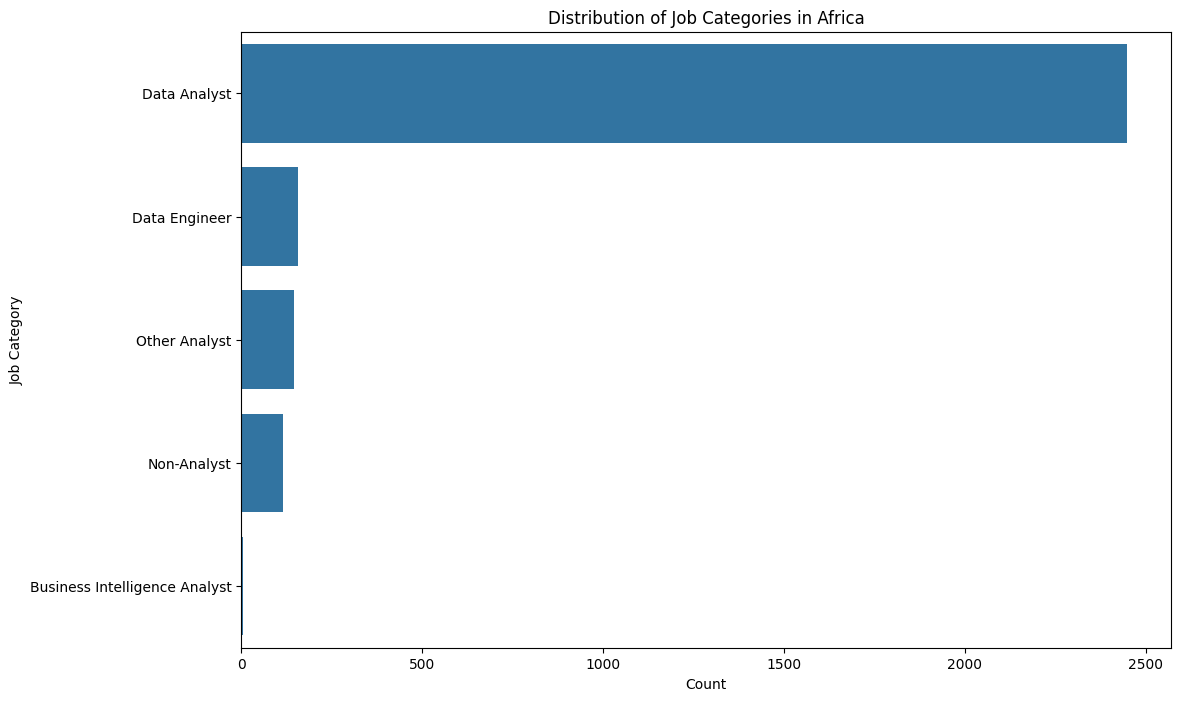

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Categories in Africa')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()

In [15]:
#Breaking down and identifying categories in 'other_analysts' and 'non_analyst
other_analysts = df[df['job_category'] == 'Other Analyst']
print("\n\n Other Analyst Breakdown\n\n")
print(other_analysts['title'].value_counts().head(10))

print("\n\n Non Analyst Breakdown\n\n")
non_analysts = df[df['job_category'] == 'Non-Analyst']
print(non_analysts['title'].value_counts().head(10))



 Other Analyst Breakdown


title
Data Customer Analyst                               38
ETL and Data Quality Analyst                        38
Data Intelligence Analyst                           38
Data Entry and Research Analyst                     20
Insights Analyst                                     6
Data Quality Analyst                                 2
Analytics Specialist                                 2
Supply Chain Data MGT Analyst, AMET (Short-term)     1
Specialist: Data Analytics                           1
Name: count, dtype: int64


 Non Analyst Breakdown


title
International consultant - Data analysis and Monitoring, Mogadishu, Somalia, 6 months [home based]    38
BI Researcher                                                                                         38
Data Analysis and Data Expert                                                                         38
Business Intelligence Consultant                                                                

### More preprocessing of 'experience_years'

In [16]:
import re

# Preprocess the description column
df['description_cleaned'] = df['description'].str.lower().str.strip()


# Define=ing a comprehensive regex pattern
experience_pattern = r'(?:(?:minimum|min\.?|at least|over|more than)\s*)?(\d+)\s*(?:[-–—to]+\s*(\d+))?\s*(?:\+)?\s*years?(?:\s*(?:of)?\s*experience)?'


# Extracting experience data using the regex pattern
experience_data = df['description_cleaned'].str.extract(experience_pattern)

# Creating new columns for minimum and maximum experience
df['experience_min'] = experience_data[0].astype(float)  # First captured group (minimum)
df['experience_max'] = experience_data[1].astype(float)  # Second captured group (maximum, if present)


# Displaying a sample of the results
print(df[['description', 'experience_min', 'experience_max']].head(10))

                                         description  experience_min  \
0  We are looking for a passionate certified Data...             NaN   
1  WATU is a focus-driven, customer-centric compa...             2.0   
2  Kuda is a fintech on a mission to make financi...             3.0   
3  Role: Data AnalystReporting to: Data Analytics...             2.0   
4  About Tata Consultancy ServicesTata Consultanc...            50.0   
5  Job description:Purpose of the Job:Using a var...             2.0   
6  Data Analyst - Investment Management - 65k-70k...             NaN   
7  Position Title: Data Analyst GROUP: Senegal En...             NaN   
8  This position is contingent upon a contract aw...             1.0   
9  About AxisWe believe that financial services s...             1.0   

   experience_max  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             5.0  
6             NaN  
7             NaN  
8             NaN  
9      

In [17]:
from word2number import w2n


up_to_pattern = r'(?:up to|less than)\s*(\d+)\s*years?(?:\s*(?:of)?\s*experience)?'
up_to_data = df['description_cleaned'].str.extract(up_to_pattern)

# Updating experience_min and experience_max for "up to" cases
df.loc[up_to_data[0].notnull(), 'experience_min'] = 0
df.loc[up_to_data[0].notnull(), 'experience_max'] = up_to_data[0].astype(float)





def convert_textual_numbers(description):
    if pd.isnull(description):
        return description
    # Replacing textual numbers with digits
    textual_numbers = {
        'one': '1', 'two': '2', 'three': '3', 'four': '4', 'five': '5',
        'six': '6', 'seven': '7', 'eight': '8', 'nine': '9', 'ten': '10'
    }
    for word, digit in textual_numbers.items():
        description = description.replace(word, digit)
    return description

# Applying textual number conversion
df['description_cleaned'] = df['description_cleaned'].apply(convert_textual_numbers)

# Re-running the extraction after converting textual numbers
experience_data = df['description_cleaned'].str.extract(experience_pattern)
df['experience_min'] = experience_data[0].astype(float)
df['experience_max'] = experience_data[1].astype(float)
df['experience_max'] = df['experience_max'].fillna(df['experience_min'])

       experience_min  experience_max
count     2021.000000     2021.000000
mean        10.695200       11.185552
std         25.297284       25.159545
min          0.000000        1.000000
25%          2.000000        3.000000
50%          3.000000        3.000000
75%          5.000000        5.000000
max        125.000000      125.000000


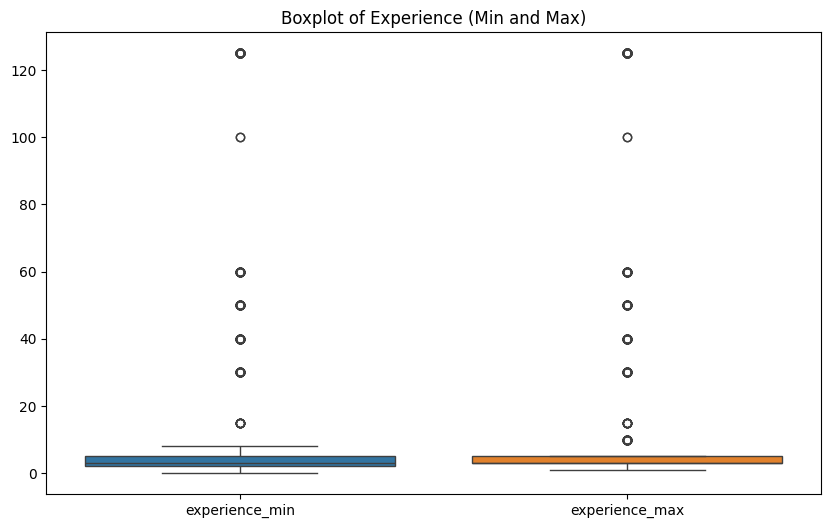

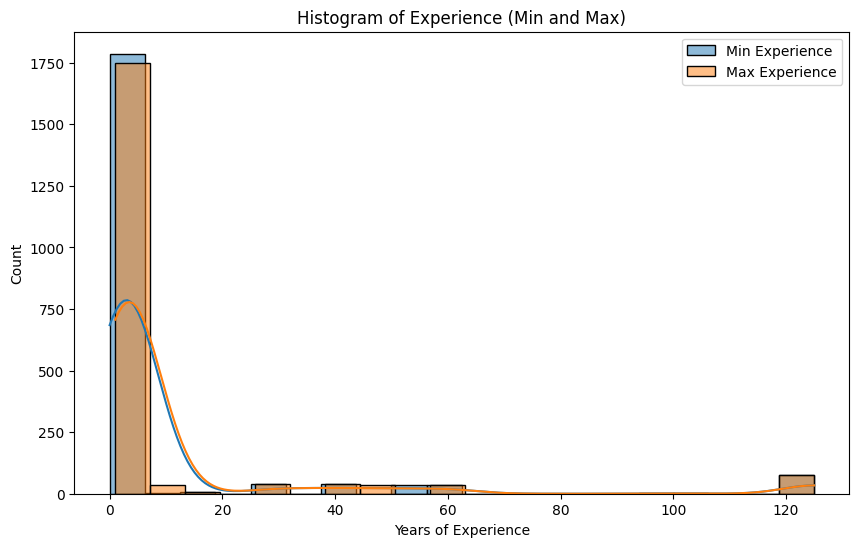

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df[['experience_min', 'experience_max']].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['experience_min', 'experience_max']])
plt.title('Boxplot of Experience (Min and Max)')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Histogram of Experience (Min and Max)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()

In [19]:
# Calculating median experience by job category
median_min_by_category = df.groupby('job_category')['experience_min'].median()
median_max_by_category = df.groupby('job_category')['experience_max'].median()

# Imputing missing values based on job category
df['experience_min'] = df.apply(
    lambda row: median_min_by_category[row['job_category']] if pd.isnull(row['experience_min']) else row['experience_min'],
    axis=1
)
df['experience_max'] = df.apply(
    lambda row: median_max_by_category[row['job_category']] if pd.isnull(row['experience_max']) else row['experience_max'],
    axis=1
)


# Defining reasonable bounds
lower_bound = 0
upper_bound = 20

# Cap outliers
df['experience_min'] = df['experience_min'].clip(lower=lower_bound, upper=upper_bound)
df['experience_max'] = df['experience_max'].clip(lower=lower_bound, upper=upper_bound)

## Exploratory Data Analysis

### Skill Analysis

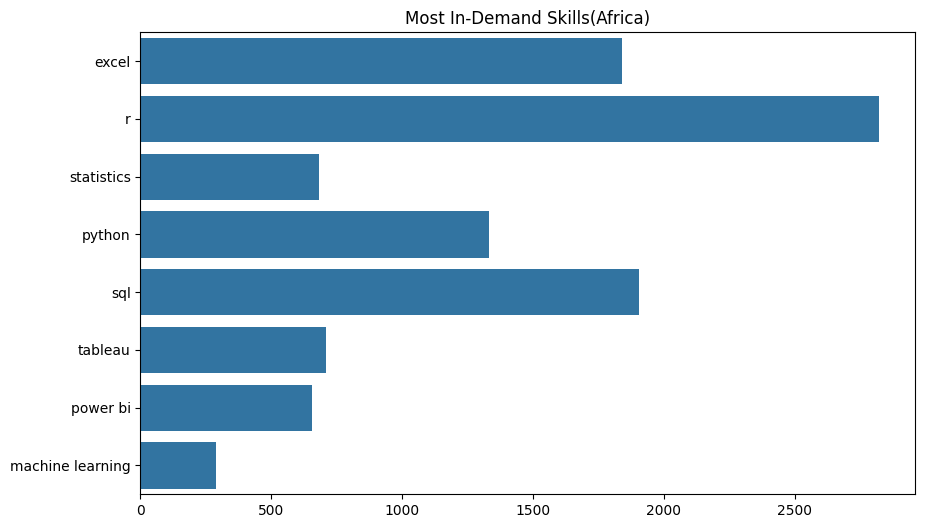

In [20]:
from collections import Counter
import re

# Extracting common skills (e.g., Python, SQL, Excel)
skills_list = ['python', 'sql', 'excel', 'tableau', 'power bi', 'r', 'statistics', 'machine learning']
def extract_skills(description):
    description = description.lower()
    skills_found = [skill for skill in skills_list if skill in description]
    return skills_found

df['skills'] = df['description'].apply(extract_skills)

# Flatten the list of skills and count frequencies
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Visualizing top skills
plt.figure(figsize=(10, 6))
sns.barplot(x=list(skill_counts.values()), y=list(skill_counts.keys()))
plt.title('Most In-Demand Skills(Africa)')
plt.show()

### Top Job Titles

title
Data Analyst                                                  1091
Remote Data Analyst Jobs                                       195
Junior Data Analyst                                            153
Data Engineer                                                   78
Data Analyst, Forward Kitchens (Remote) - $60,000/year USD      76
Data Analyst Graduate                                           39
Commercial Data Analyst                                         38
Reporting and Data Analyst                                      38
Data Analyst/Developer                                          38
Data Analyst (Global Remote)                                    38
Name: count, dtype: int64


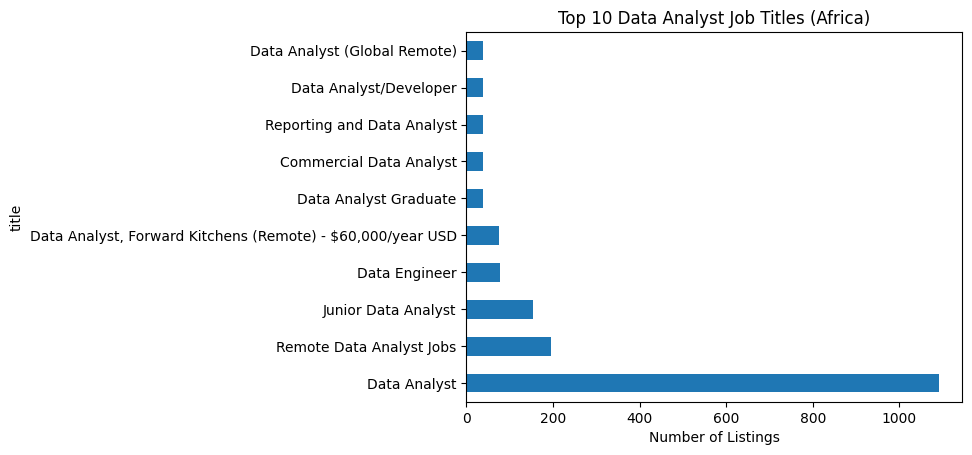

In [21]:
print(df['title'].value_counts().head(10))


import matplotlib.pyplot as plt
df['title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Data Analyst Job Titles (Africa)')
plt.xlabel('Number of Listings')
plt.show()




 Top Hiring Companies: 
 
company
Turing.com                         211
Progressive Edge                   146
Crossover                          114
Experian                           114
FNB South Africa                    76
Watu Credit                         72
Ozow                                61
ICF                                 54
Ovations Technologies (Pty) Ltd     54
Tiger Personnel Management          39
Name: count, dtype: int64

 Top Locations: 

location
Cape Town, Western Cape, South Africa           416
Johannesburg, Gauteng, South Africa             341
South East, South-East District, Botswana       272
Lagos, Lagos State, Nigeria                     215
City of Johannesburg, Gauteng, South Africa     188
Johannesburg Metropolitan Area                  136
Cairo, Cairo, Egypt                             112
South Africa                                     92
Nzalae/ Nzawa locations, Kitui County, Kenya     90
Egypt                                            87
N

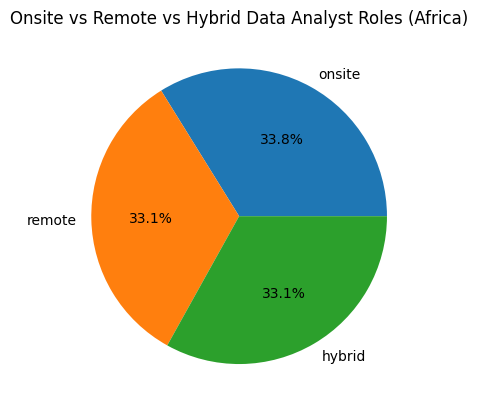

In [22]:
#Top Hiring companies
print("\n Top Hiring Companies: \n ")
print(df['company'].value_counts().head(10))


#Top Locations
print("\n Top Locations: \n")
print(df['location'].value_counts().head(10))

#Distribution of Onsite/remote/hybrid roles
print(df['onsite_remote'].value_counts())
df['onsite_remote'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Onsite vs Remote vs Hybrid Data Analyst Roles (Africa)')
plt.ylabel('')
plt.show()



### Job Criteria and Description Analysis

In [26]:
#Counting how many job descriptions mention 'python'
print("\n Number of Python mentions")
df['has_python'] = df['description'].str.lower().str.contains('python')
print(df['has_python'].sum())

#Counting how many job descriptions mention "sql"
print("\n Number of SQL mentions")
df['has_sql'] = df['description'].str.lower().str.contains('sql')
print(df['has_sql'].sum())

#Counting how many job descriptions mention "excel"
print("\n Number of Excel mentions")
df['has_excel'] = df['description'].str.lower().str.contains('excel')
print(df['has_excel'].sum())

#Counting how many job descriptions mention "R"
print("\n Number of R mentions")
df['has_r'] = df['description'].str.lower().str.contains('r')
print(df['has_r'].sum())


from collections import Counter
import re

all_criteria = ' '.join(df['criteria'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_criteria)
common_words = Counter(words).most_common(20)
print(common_words)



 Number of Python mentions
1333

 Number of SQL mentions
1903

 Number of Excel mentions
1838

 Number of R mentions
2820
[('level', 4206), ('employment', 2460), ('type', 2460), ('seniority', 2438), ('job', 2438), ('function', 2438), ('industries', 2438), ('and', 2421), ('information', 2185), ('full', 2176), ('time', 2176), ('technology', 2074), ('services', 1556), ('it', 1230), ('entry', 1073), ('consulting', 782), ('mid', 695), ('senior', 695), ('مستوى', 484), ('financial', 482)]


C:\Users\PrinceAndyBabayi\AppData\Local\Temp\ipykernel_548\3186582495.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('posted_date').resample('M').size().plot()


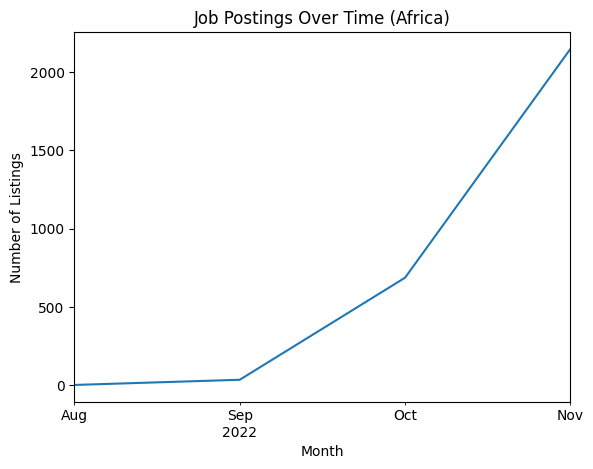

In [32]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df.set_index('posted_date').resample('M').size().plot()
plt.title('Job Postings Over Time (Africa)')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.show()


### Experience by Job Category

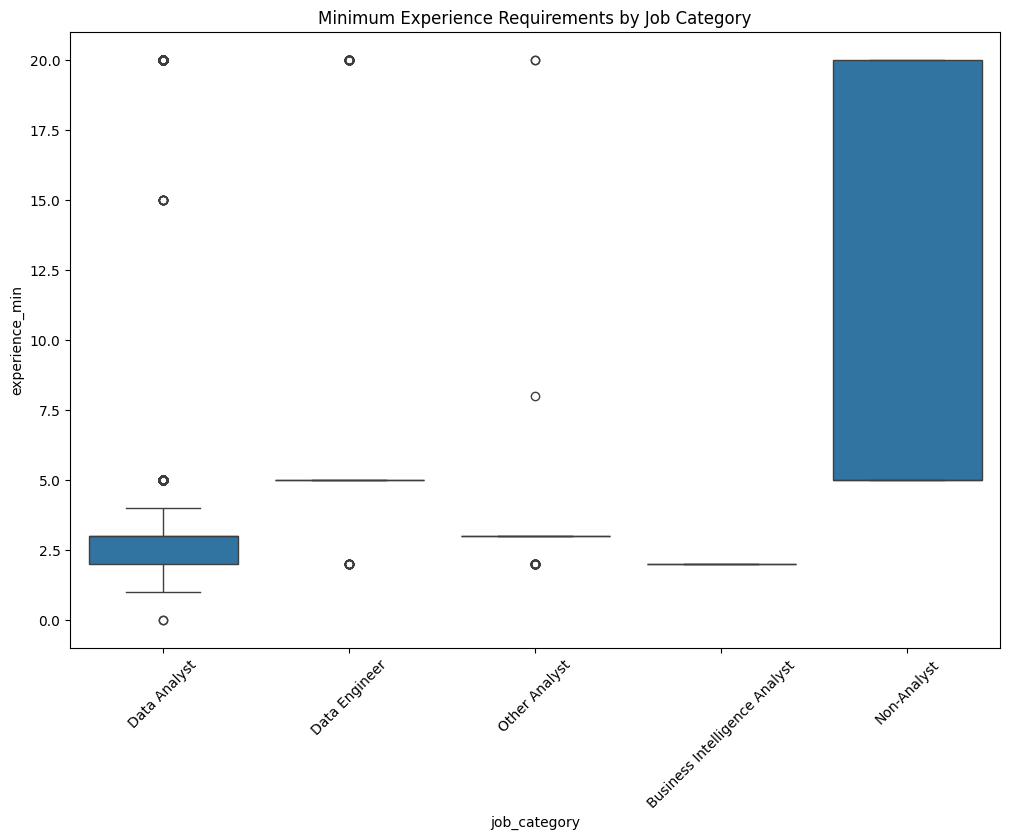

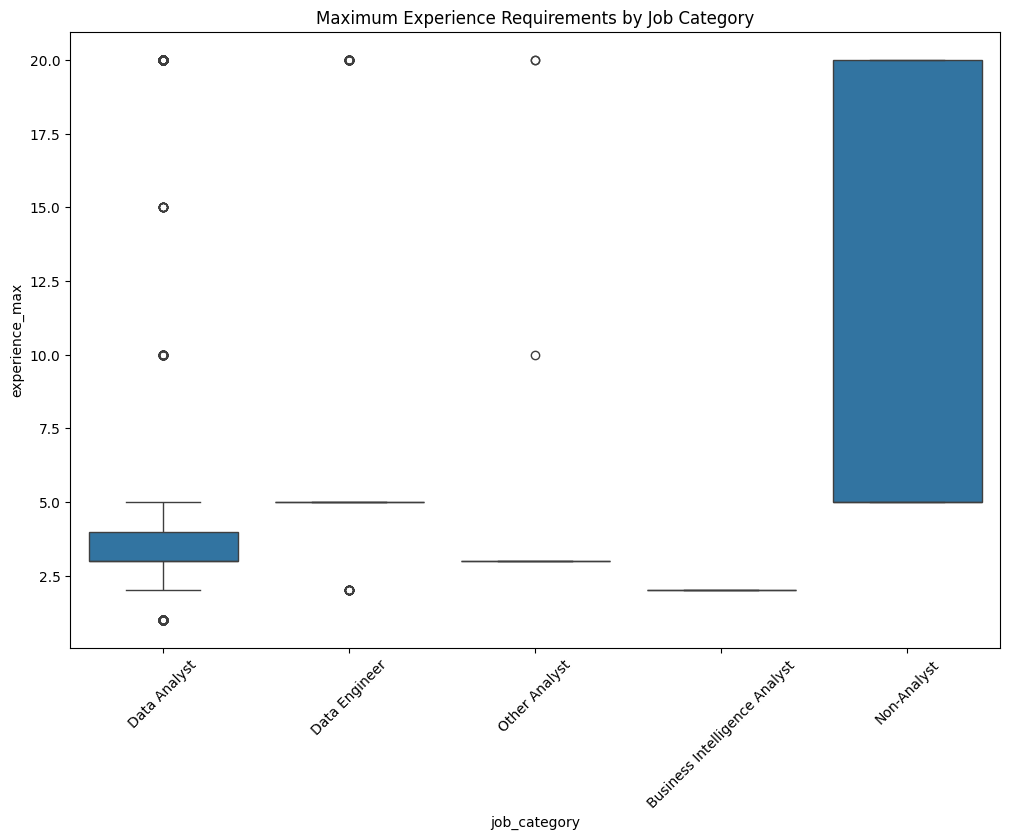

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_min')
plt.title('Minimum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_max')
plt.title('Maximum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

### Distribution of Experience Requirement

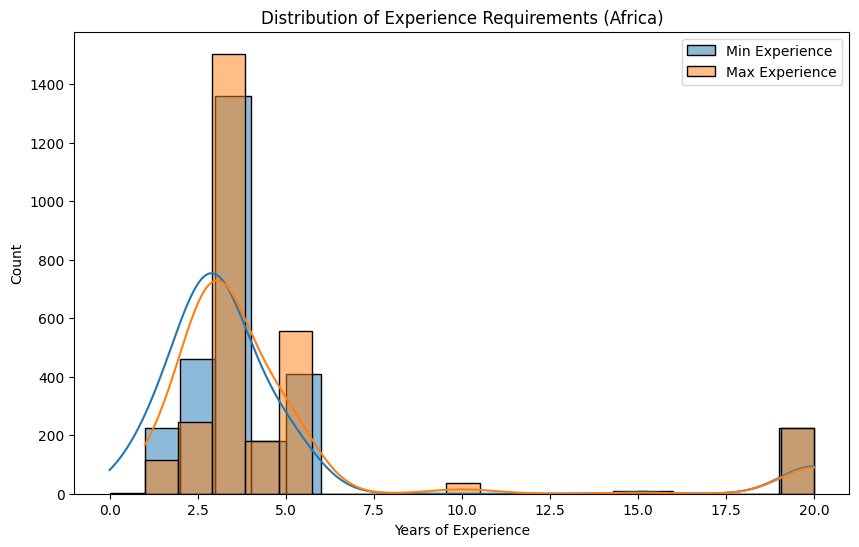

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Distribution of Experience Requirements (Africa)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()